# 0. Introduction

* 목표: 선형회귀 모델 구축
* 새로운 입력데이터를 보고 반응변수 값을 예측, 평가.


# 1. 모듈 불러오기

In [6]:
#보스터 주거 데이터 패키지
from sklearn.datasets import load_boston

#데이터 전처리 패키지
import numpy as np
import pandas as pd

# 머신러닝 모델 구축 및 평가용
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols


from sklearn.model_selection import train_test_split #train_test 데이터셋 나눠주는 패키지
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#한글폰트 설정
plt.rc('font', family = 'Malgun Gothic')

print("import OK")

import OK


# 2. 데이터 불러오기

In [7]:
#보스턴 주택 가격 데이터 불러오기

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [17]:
# 데이터 확인
print("보스턴 데이터 확인: \n", boston.data,'\n')

# Y값, 주택 가격 확인하기
print("보스턴 주택가격(Y_Value)확인: \n", boston.target)

보스턴 데이터 확인: 
 [[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]] 

보스턴 주택가격(Y_Value)확인: 
 [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5

In [18]:
#데이터 변수명 확인
print("보스턴 변수명 (X_Value_Feature_names):\n",boston.feature_names)

보스턴 변수명 (X_Value_Feature_names):
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [21]:
# 데이터 규격 확인
print("데이터 사이즈 확인:\n", boston.data.shape)

데이터 사이즈 확인:
 (506, 13)


# 3. 데이터 전처리 하기

In [27]:
# 판다스를 이용하여 데이터프레임 형태로 전환. X, Y의 변수에 입력

X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])


In [28]:
print(X.head()) #df 첫 5행만 확인
print(y.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [29]:
# train_test_set 나누기

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2021)
#random_state는 시드값을 고정시켜, 반복 실행 시켜도 같은 분리형태로 고정시켜줌. 숫자는 큰 의미 없음


# 4. 선형회귀모델 예측하기
* statsmodel의 ols를 사용하여 분석을 실행
* ols는 잔차제곱합을 최소화하는 가중치를 구하는 방법.
* 통계 패키지가 잘 되어 있는 것이 특징.

## 4.1 선형회귀 모델 생성, 가정 확인하기.

In [31]:
X_train = sm.add_constant(X_train) # b0를 따로 선언, 생성하기.
model = sm.OLS(y_train, X_train, axis = 1)
model_trained = model.fit() #모델 구축하기

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### 4.1.1 확률 오차의 정규성 확인.

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


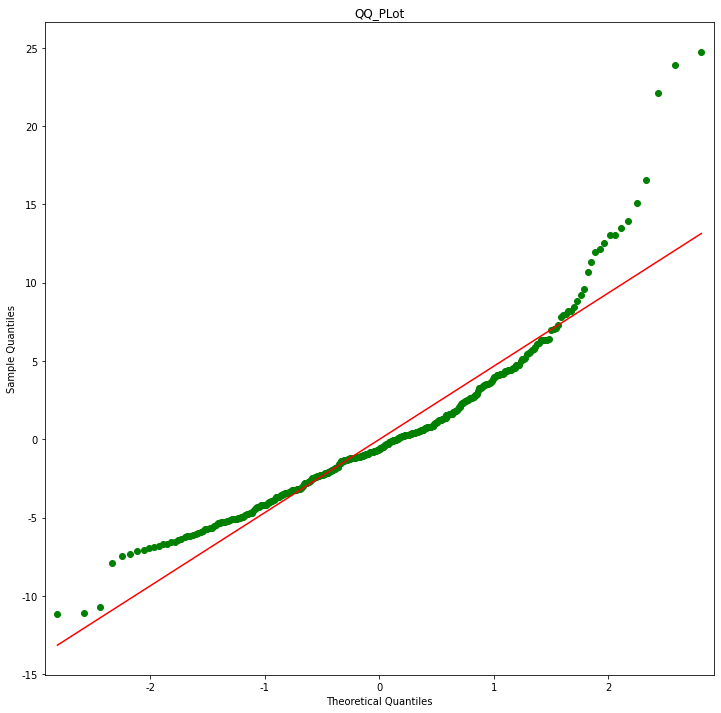

In [34]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False #값이 음수가 되었을때 폰트가 깨지는 것을 방지
fig, ax = plt.subplots(1,1) #그래프 영역을 생성. 하나만 생성할 것이므로 (1,1)로

#그래프 출력 사이즈 (12,12) 사이즈로 생성
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line = 's', color = 'green', ax = ax)
ax.title.set_text('QQ_Plot')

### 4.1.2 확룰 오차의 등분산성 확인

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Fitted Values')]

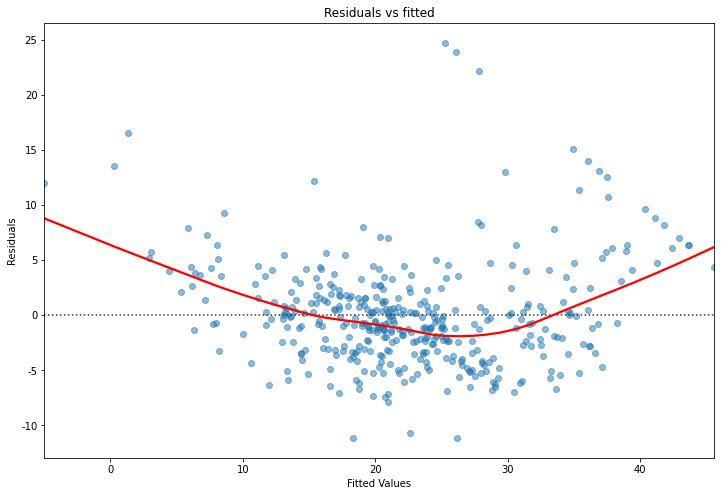

In [35]:
model_fitted_y = model_trained.fittedvalues

fig, ax = plt.subplots(1,1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data = X_train, lowess = True,scatter_kws = {'alpha':0.5}, line_kws ={'color':'red'},ax = ax)
#residplot params,
#lowess: Boolean, Fit a lowess smoother

ax.title.set_text('Residuals vs fitted')
ax.set(xlabel= 'Fitted Values',ylabel= 'Residuals')


## 4.2 통계적으로 해석하기

In [38]:
print(model_trained.summary()) #통계값 확인. 결정계수, p-value, F통계량 등...

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     93.01
Date:                Tue, 21 Jun 2022   Prob (F-statistic):          1.02e-110
Time:                        06:50:12   Log-Likelihood:                -1196.3
No. Observations:                 404   AIC:                             2421.
Df Residuals:                     390   BIC:                             2477.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0744      5.844      6.002      0.0

* p-value 가 높은 INDUS(0.962), AGE(0.476)은 모델에서 유의하지 않아 변수에서 제외하고 다시 모델을 생성.

In [39]:
model = sm.OLS(y_train, X_train.drop(['INDUS','AGE'],axis = 1)) #axis = 1: 컬럼기준으로 드랍.
model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     110.3
Date:                Tue, 21 Jun 2022   Prob (F-statistic):          1.19e-112
Time:                        06:55:23   Log-Likelihood:                -1196.5
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     392   BIC:                             2465.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6295      5.783      5.988      0.0

## 4.3 미래의 반응변수(Y) 값 예측하기

In [ ]:
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(8,8))
plt.title('실제 값 vs 모델 출력 값')
plt.scatter(y_train, y_train_pred)
plt.plot([-5,55],[-5,55], ls = '--', c= 'red')
plt.xlabel('실제 값',size = 16)
plt.ylabel('모델 출력',size = 16)
plt.xlim(-5,55)
plt.ylim(-5,55)
plt.show()

#런타임 경고(폰트 출력 안됨)

In [46]:
X_test = sm.add_constant(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [48]:
y_test_pred = model_trained.predict(X_test.drop(['INDUS','AGE'],axis = 1)) # 모델 예측값을 생성.
y_test_pred.head()

210    22.787949
24     15.482380
36     22.346630
439    13.433993
161    36.890921
dtype: float64

### 4.3.1 MSE (평균제곱오차)

In [49]:
print(mean_squared_error(y_test,y_test_pred)) #모델 예측값과 실제 Y값의 차이의 MSE 값을 확인

23.063158240353886


### 4.3.2 RMSE (제곱근 평균 제곱 오차)

In [51]:
print(np.sqrt(mean_squared_error(y_test,y_test_pred)))

4.802411710833827


### 4.3.3 MAE(평균 절대 오차)

In [52]:
print(mean_absolute_error(y_test,y_test_pred))

3.51230235089512


### 4.3.4 MAPE(평균 절대 백분율 오차)

In [54]:
def mean_absolute_persentage_error(y_true, y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true))*100

print(mean_absolute_persentage_error(y_test,y_test_pred))

43.94575164039092


### 4.3.5 R squared (결정계수)

In [55]:
print(r2_score(y_test,y_test_pred))

0.6389403215499556


# statmodel vs sklearn